In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random 

# Buffons Needle Problem

**Task:** Perform large number of trials and estimate the value of pi. Plot the error as a function of the number of trials

Problem Description:

Drop a needle with length L onto a flat surface with regularly spaced grid marks at a distance of D. Measure the distance from the center of the needle (x) to the nearest grid, and the angle of the needle (theta). Determine when the needle crosses a line by comparing x and L/2*sin(theta). Divide the number of crosses by the total tosses to get an estimate of pi. 

1. Valid center positions $0 \leq x \leq d/2$
1. Valid angle positions: $0 \leq \theta \leq \pi/2$
1. Hit equation: $ x \leq \frac{L}{2} \sin \theta $

In [64]:
class BuffonNeedle:
    
    def __init__(self, length=1, distance=2):
        self.hits = 0
        self.tosses = 0
        self.half_length=length/2
        self.half_distance=distance/2
        self.estimate = []
        
    def reset(self):
        self.estimate = []
        self.hits = 0
        self.tosses = 0
        
    def step(self):
        x = random.random()*self.half_distance
        theta = random.random()*np.pi/2
        if x <= self.half_length*np.sin(theta):
            self.hits +=1
        self.tosses +=1
        if self.hits > 0:
            self.estimate.append(self.tosses/self.hits)
        else:
            self.estimate.append(np.nan)
        
        
    def simulate(self, tosses=100):
        self.reset()
        for drop in range(tosses):
            self.step()
        return self.estimate[-1]
    

In [65]:
bn = BuffonNeedle()
bn.simulate(tosses=1000000)
print(f"Estimate for pi is: {bn.estimate[-1]}")

Estimate for pi is: 3.1421147060394587


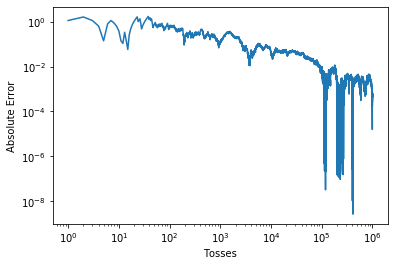

In [66]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Absolute Error')
ax.set_xlabel('Tosses')
ax.plot(np.abs(np.subtract(np.pi,bn.estimate)))

## Compare Strategy of many tosses, versus many experiments
Perform 2,000,000 trials of Buffon’s needle problem for 1/π: (a) by
partitioning the trials into 10,000 “super experiments” of 200 trials each;
(b) by partitioning the trials into 1000 “super experiments” of 2000 trials
each; (c) by partitioning the trials into 100 “super experiments” of 20,000
trials each. Compare the results you obtain and comment.

In [4]:
class MonteCarlo:
    """
    We will try to use this monte carlo class for many of our simulations. It will restore a list of outcomes as a 
    field titled "results". 
    
    Later we will update this to include the multiprocessing module to run our simulations faster.
    """
    
    def __init__(self):
        self.results = []
    
    def run(self,simulation_object, number_of_simulations, *args, **kwargs):
        """
        Pass a simulation object (our Plink Class for example), the number of times to run the MC simulation, and any arguments 
        keyword arguments that are necessary for the simulate command of the simulation object
        
        """
        
        self.results = [simulation_object.simulate(*args,**kwargs) for i in range(number_of_simulations)]
        
            

Mean is :3.1812097343821173, Std is :0.3441372722718598


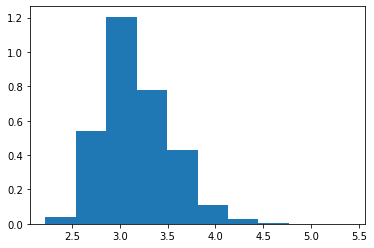

In [58]:
# 10,000 super experiments of 200 tosses
mc = MonteCarlo()
bn = BuffonNeedle()
mc.run(bn, number_of_simulations=10000, tosses=200)
plt.hist(mc.results, density=True)
print(f"Mean is :{np.mean(mc.results)}, Std is :{np.std(mc.results)}")

Mean is :3.142835882762865, Std is :0.10658956641769654


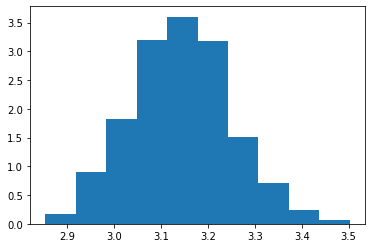

In [59]:
# 1,000 super experiments of 2000 tosses
mc = MonteCarlo()
bn = BuffonNeedle()
mc.run(bn, number_of_simulations=1000, tosses=2000)
plt.hist(mc.results, density=True)
print(f"Mean is :{np.mean(mc.results)}, Std is :{np.std(mc.results)}")

Mean is :3.1486951771275002, Std is :0.10564174464566686


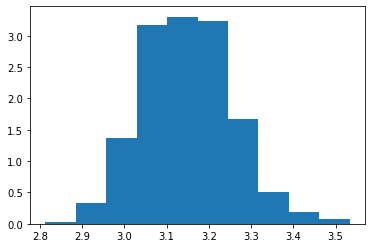

In [60]:
# 100 super experiments of 20000 tosses
mc = MonteCarlo()
bn = BuffonNeedle()
mc.run(bn, number_of_simulations=1000, tosses=2000)
plt.hist(mc.results, density=True)
print(f"Mean is :{np.mean(mc.results)}, Std is :{np.std(mc.results)}")

It would appear you would need to balance the number of experiments and the number of tosses. The 1000, and 100 tosses gave similar distributions with a similar accuracy. This makes some sense as looking at the error plot for the number of tosses. If you ran thousands of experiments at only a hundred tosses, the deviation would be similar to the error. 

# Rolling the Dice

Simulate 1000 rolls of a pair of dice and histogram the results as (a)
the sum of the dice and (b) the individual pairs, e.g. (1, 1) and (1, 2) and
. . . through (6, 6). (c) Do the part (a) for the roll of 6 dice; histogram 4000
rolls.

In [113]:
class RollDice:
    
    def __init__(self, sides=6, number_of_dice=2):
        self.history = []
        self.total = []
        assert sides >= 2, "Sides must be greater than or equal to 2"
        self.sides = int(sides)
        assert number_of_dice >=1, "Number of dice must be greater than eqal to 1"
        self.number_of_dice = int(number_of_dice)
        
    def reset(self):
        self.history = []
        self.total = []
        
    def step(self):
        rolls = [random.randint(1,self.sides) for _ in range(self.number_of_dice)]
        self.total.append(np.sum(rolls))
        self.history.append(rolls)
        
    def simulate(self, tosses=100):
        self.reset()
        for j in range(tosses):
            self.step()
    


In [114]:
dice = RollDice()
dice.simulate(tosses=10000)

(array([ 285.,  558.,  822., 1095., 1392., 1685., 1414., 1119.,  786.,
         561.,  283.]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 <a list of 11 Patch objects>)

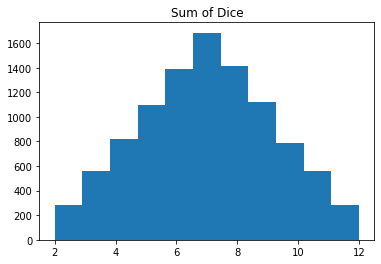

In [115]:
fig, ax = plt.subplots()
ax.set_title("Sum of Dice")
ax.hist(dice.total, bins=11)

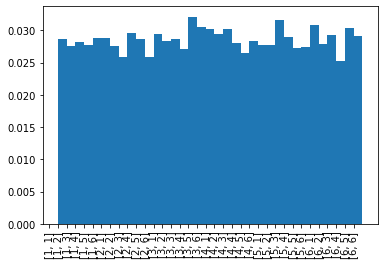

In [133]:
# Plot the histogram of the paired dice rolls
l=[ f"{x}" for x in dice.history]
l.sort()
fig, ax = plt.subplots()
bins = np.arange(1, dice.sides**dice.number_of_dice+1) 
ax.hist(l, bins=bins, density=True)
ax.tick_params(axis='x', rotation=90)
pass

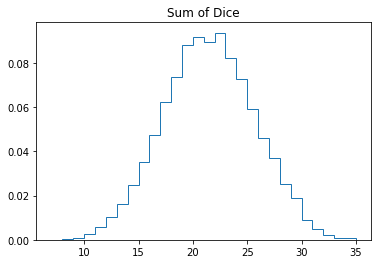

In [150]:
# Perform the summed dice roll for 6 dice
dice = RollDice(number_of_dice=6)
dice.simulate(tosses=10000)

fig, ax = plt.subplots()
ax.set_title("Sum of Dice")
ax.hist(dice.total,bins=28, histtype='step', density=True)
pass

Suppose a “reward” r(x) is given upon the roll of a pair of dice as
follows: r(x) = 1/x, x = 2, 3, . . . , 12. Estimate the expectation of r by
simulation
( 1
36
 1
2 + 2
3 + 3
4 + 4
5 + 5
6 + 6
7 + 5
8 + 4
9 + 3
10 + 2
11 + 1
12

= 0.1678).

In [1]:
dice = RollDice()
dice.simulate(tosses=10000)
np.mean(np.divide(1,dice.total))

NameError: name 'RollDice' is not defined

# Bayesian Probability

1. P(A|B) = How often A happens given that B happens
1. P(B|A) = How often B happens, given that A happens
1. P(A) = How likely A is ont is own
1. P(B) = How Likely B is on its own

For a diagnostic: 

* 98% diagnostic accuracy **this is not P(A) but rather P(A|B)**
* 3% of community have the disease (PB)
* 97% of community don't have the disease(P(Bc))
* What is P(A|B)? How often a person has the disease that is tested accurately (0.98)

How likely is that a person with a positive test (A) also has has the disease (B)? 


$P(B|A) = \frac{ P(B)P(A|B)}{Pr(A|B)Pr(B)+Pr(A|Bc)Pr(Bc)}$

P(A|B) = 0.98
P(B) = 0.03
P(Bc) = 0.97
p(A|Bc) = 0.02




In [47]:
P_b_given_a = 0.98*0.03/(0.98*0.03+0.02*0.97)
print(f"Probability person has disease with positive test is: {P_b_given_a}")

Probability person has disease with positive test is: 0.6024590163934427


In [51]:
class Diagnostic:
    """
    Simulation for simple disease and diagnostic model. Model can be used to calculate the 
    conditional probability P(B|A), that is the probability a person as the disease when presented
    with a positive test. 
    """
    
    def __init__(self, communal_infection=0.03, diagnostic_accuracy=0.98):
        self.communal_infection =communal_infection
        self.diagnostic_accuracy = diagnostic_accuracy
        self.total_positive = 0
        self.case_positive = 0
        
    def reset(self):
        self.total_positive = 0
        self.case_positive = 0
        
    def step(self):
        person = random.random()
        test = random.random()
        
        if person < self.communal_infection:
            if test < self.diagnostic_accuracy:
                self.case_positive +=1
                self.total_positive +=1
        else:
            if test > self.diagnostic_accuracy:
                self.total_positive +=1
 
    
    def simulate(self, tests=100):
        self.reset()
        for i in range(tests):
            self.step()
        return self.case_positive/self.total_positive
    
    

In [52]:
dg = Diagnostic()
dg.simulate()

0.3333333333333333

Probability of Positive Test and Positive Case is: 0.601 +/- 0.073


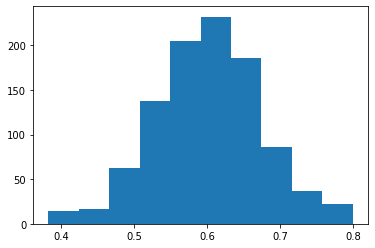

In [53]:
mc = MonteCarlo()
dg = Diagnostic()
mc.run(dg, 1000, 1000)


plt.hist(mc.results)
print(f"Probability of Positive Test and Positive Case is: {np.mean(mc.results):.3f} +/- {np.std(mc.results):.3f}")